In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import seaborn as sns
sns.set_theme(style='darkgrid')

In [22]:
data = pd.read_csv("/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv")
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [24]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [25]:
data = data.dropna()
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [26]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.covariance import EllipticEnvelope

numeric_data = data.select_dtypes(include=['number'])

x = numeric_data.drop(['loan_status'], axis=1)
y = data['loan_status']

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

# Calculating the mean squared error
mse = mean_squared_error(y, y_pred)

# Detecting outliers using the Elliptic Envelope method
outlier_detector = EllipticEnvelope(contamination=0.1)
outlier_detector.fit(x)

# Identifying outliers
outliers = outlier_detector.predict(x) == -1

# Removing outliers from the dataset
data = data[~outliers]

# Printing the results
print("Mean Squared Error:", mse)
print("Outliers:", sum(outliers))

Mean Squared Error: 0.1261861967807924
Outliers: 2850


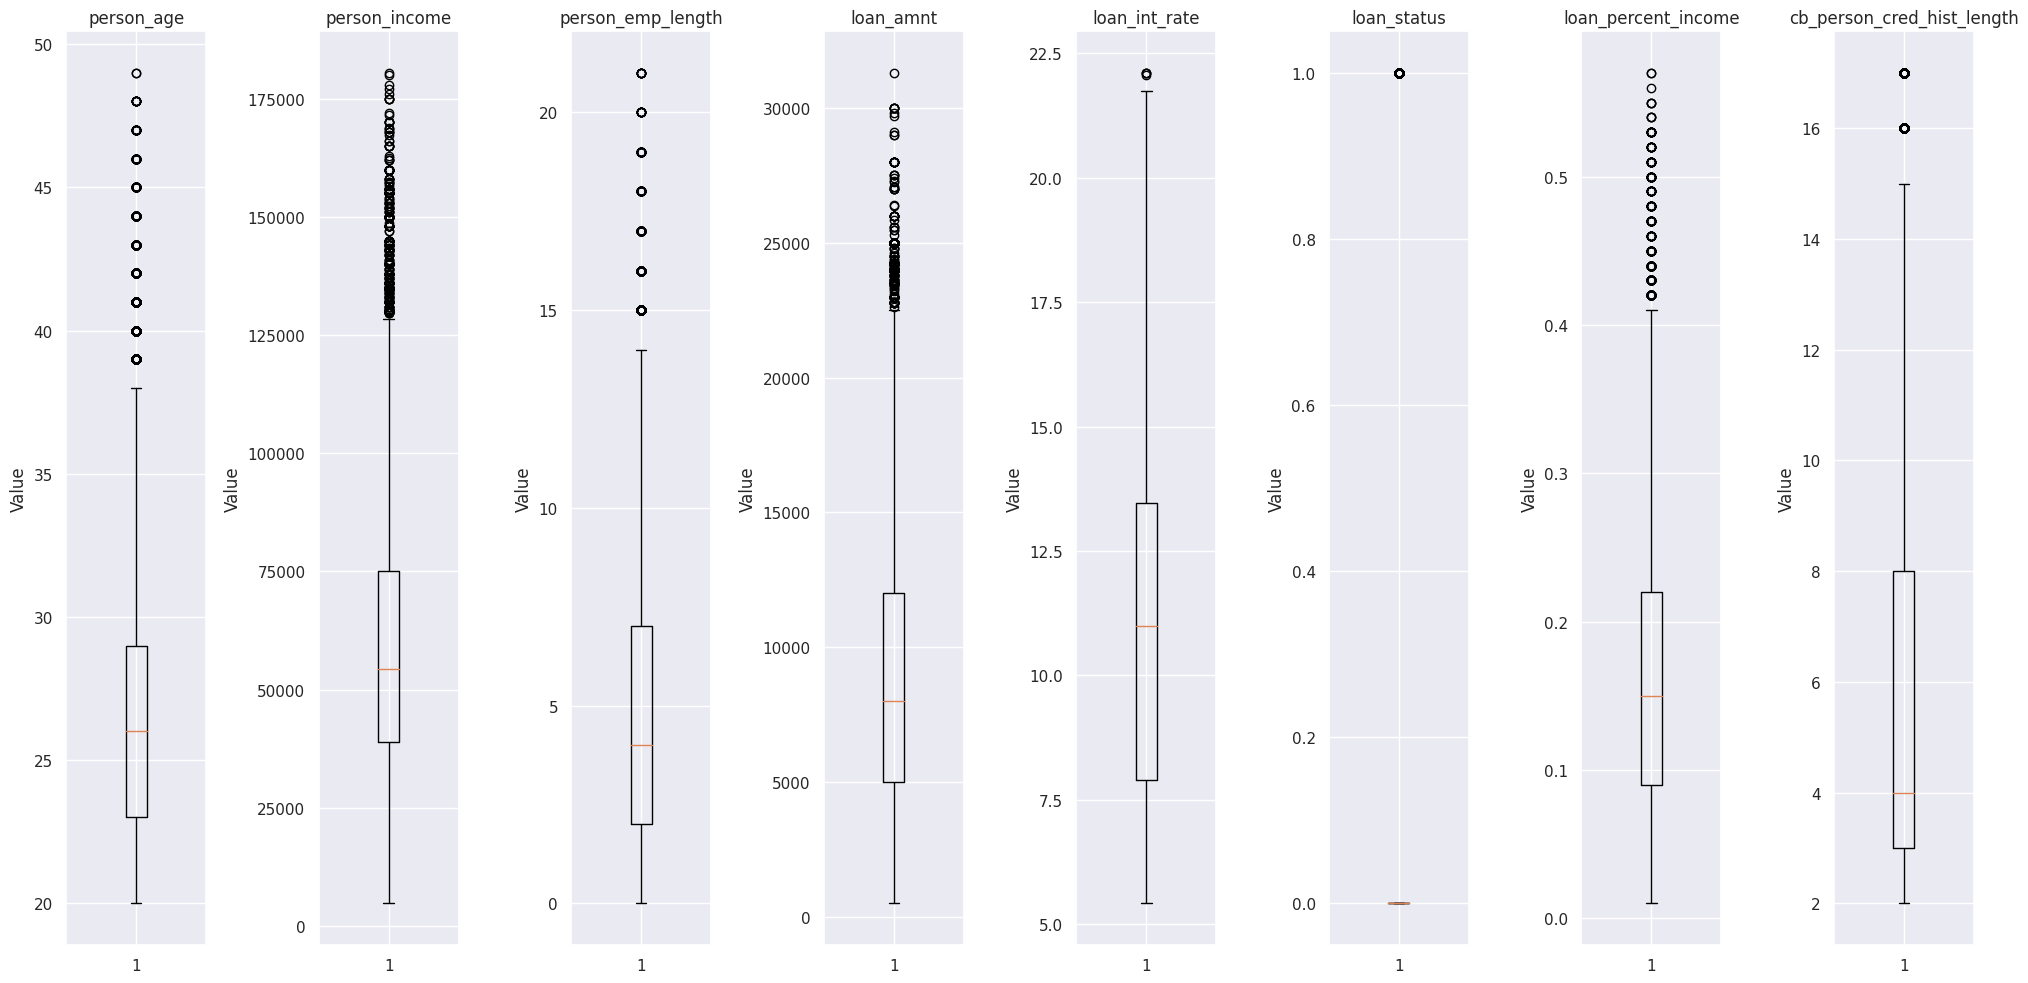

In [28]:
# Create a box plot to visualize outliers
numeric_data = data.select_dtypes(include=['number'])

# Create a figure to hold all the box plots
plt.figure(figsize=(20, 10))

# Loop through each column in the numeric data and create a box plot
for i, column in enumerate(numeric_data.columns):
    plt.subplot(1, len(numeric_data.columns), i + 1)
    plt.boxplot(numeric_data[column])
    plt.title(column)
    plt.ylabel('Value')

# Adjust layout
plt.tight_layout()

# Show the box plots
plt.show()

In [29]:
loan_status_values = data["loan_status"].unique()
loan_status_values

array([0, 1])

In [30]:
print('Non Default', round(data['loan_status'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Default', round(data['loan_status'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Non Default 79.31 % of the dataset
Default 20.69 % of the dataset


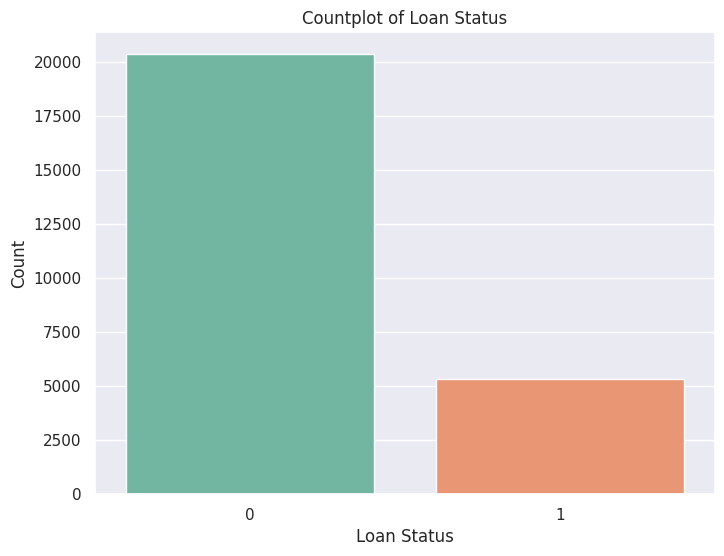

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x="loan_status", data=data, palette="Set2", order=loan_status_values)
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Countplot of Loan Status")
plt.show()

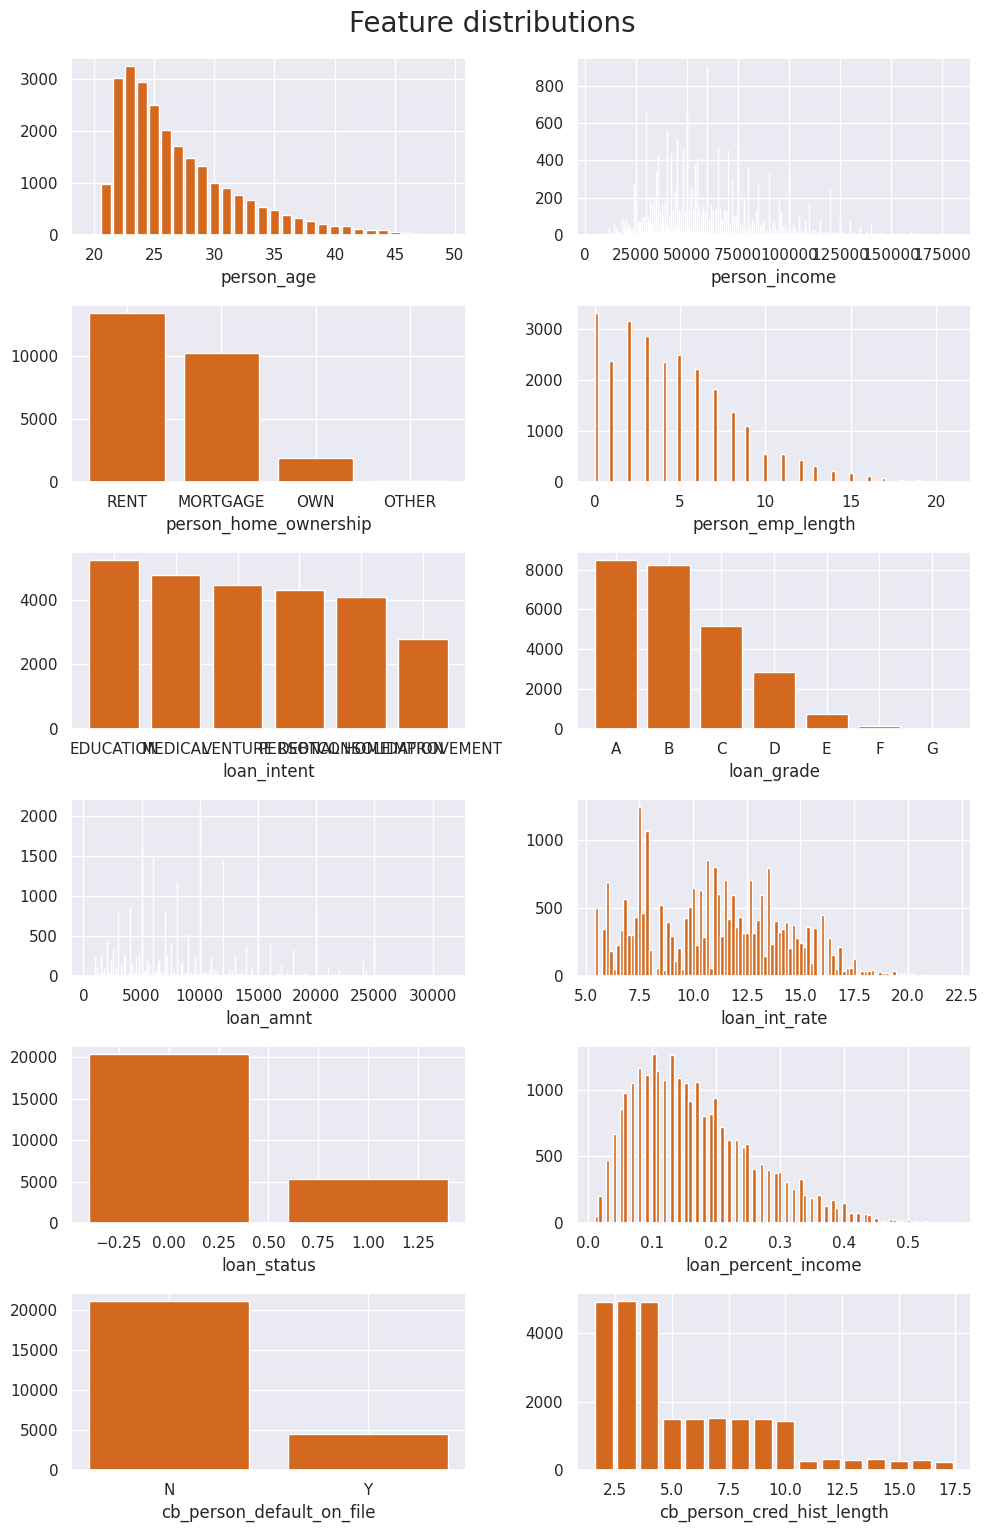

In [32]:
#data distribution
_, axs = plt.subplots(6, 2, figsize=(10, 15))
for col, ax in zip(data.columns, axs.ravel()):
    if data[col].dtype == float:
        ax.hist(data[col], bins=100, color='chocolate')
    else: #int
        vc = data[col].value_counts()
        ax.bar(vc.index, vc, color='chocolate')
    ax.set_xlabel(col)
plt.tight_layout()
plt.suptitle('Feature distributions', y=1.02, fontsize=20)
plt.show()

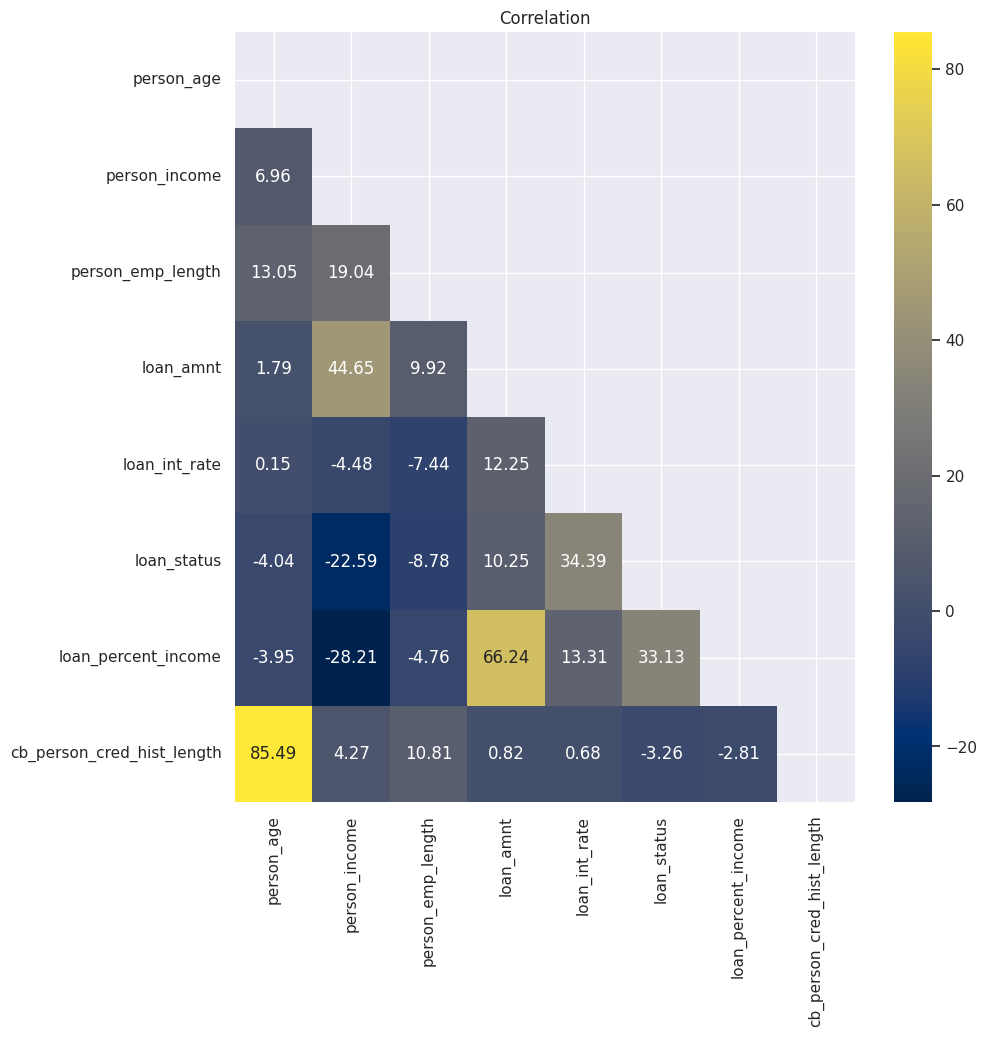

In [33]:
# correlation plot
plt.figure(figsize=(10, 10)) 
data_num = data.select_dtypes(include=['number'])
corr = data_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr * 100, cmap = 'cividis', annot= True, fmt='.2f', mask=mask)
plt.title('Correlation')
plt.show()

In [34]:
#declare features vector and target
x = data.drop(['loan_status'], axis=1)
y = data['loan_status']

In [35]:
#define category features
data_cat = x.select_dtypes(include=['object'])

# Calculate and display the number of unique values for each 'object' column
for column in data_cat.columns:
    unique_count = data_cat[column].nunique()
    print(f"Column '{column}' has {unique_count} unique values.")

Column 'person_home_ownership' has 4 unique values.
Column 'loan_intent' has 6 unique values.
Column 'loan_grade' has 7 unique values.
Column 'cb_person_default_on_file' has 2 unique values.


In [36]:
# Encoding Categorical Variables
x_encoded = pd.get_dummies(x, columns=data_cat.columns)
x_encoded

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0.10,2,False,False,True,...,False,False,True,False,False,False,False,False,True,False
5,21,9900,2.0,2500,7.14,0.25,2,False,False,True,...,True,True,False,False,False,False,False,False,True,False
9,21,10000,6.0,1600,14.74,0.16,3,False,False,True,...,True,False,False,False,True,False,False,False,True,False
19,24,10800,8.0,1750,10.99,0.16,2,True,False,False,...,False,False,True,False,False,False,False,False,True,False
23,24,10980,0.0,1500,7.29,0.14,3,False,False,True,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32287,36,44000,4.0,8000,17.49,0.18,15,False,False,False,...,False,False,False,False,True,False,False,False,True,False
32290,37,90000,11.0,4000,6.62,0.04,15,True,False,False,...,False,True,False,False,False,False,False,False,True,False
32293,38,110000,5.0,16000,11.99,0.15,13,True,False,False,...,False,False,True,False,False,False,False,False,True,False
32294,36,92000,18.0,4000,7.29,0.04,13,True,False,False,...,False,True,False,False,False,False,False,False,True,False


In [37]:
# Apply SMOTE to the training data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_encoded, y)

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_resampled)
x_scaled = scaler.transform(x_resampled)

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_resampled, test_size=0.2, random_state=42)

In [40]:
# Define the base model
from sklearn.metrics import accuracy_score

def create_model(units1=64, units2=32, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units=units1, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=units2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model
    
# Define the hyperparameter search
param_dist = {
    'units1': [32, 64, 128],
    'units2': [16, 32, 64],
    'dropout_rate': [0.2, 0.3, 0.4],
    'learning_rate': [0.001, 0.01, 0.1]
}

best_accuracy = 0
best_hyperparameters = None

for _ in range(10):  # You can adjust the number of iterations
    hyperparameters = {param: np.random.choice(values) for param, values in param_dist.items()}
    model = create_model(**hyperparameters)
    model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)
    y_pred = (model.predict(x_test) > 0.5).astype('int32')
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Hyperparameters: {hyperparameters}, Accuracy: {accuracy:.4f}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_hyperparameters = hyperparameters

# Print the best hyperparameters
print("Best Hyperparameters:", best_hyperparameters)
print("Best Accuracy:", best_accuracy)

Epoch 1/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.5864 - accuracy: 0.8039
Epoch 2/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.6710 - accuracy: 0.7480
Epoch 3/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.6144 - accuracy: 0.7540
Epoch 4/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.5102 - accuracy: 0.7659
Epoch 5/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.4780 - accuracy: 0.7860
Epoch 6/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.6965 - accuracy: 0.7803
Epoch 7/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.4895 - accuracy: 0.7667
Epoch 8/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.5725 - accuracy: 0.7621
Epoch 9/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.5054 - accuracy: 0.7686
Epoch 10/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.475

In [41]:
# Use the best hyperparameters to create the final model
final_model = create_model(**best_hyperparameters)
history = final_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=1)

Epoch 1/50
1018/1018 [==============================] - 3s 2ms/step - loss: 0.2797 - accuracy: 0.8845 - val_loss: 0.1897 - val_accuracy: 0.9292
Epoch 2/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.2029 - accuracy: 0.9249 - val_loss: 0.1773 - val_accuracy: 0.9370
Epoch 3/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.1883 - accuracy: 0.9317 - val_loss: 0.1717 - val_accuracy: 0.9403
Epoch 4/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.1800 - accuracy: 0.9363 - val_loss: 0.1675 - val_accuracy: 0.9414
Epoch 5/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.1743 - accuracy: 0.9382 - val_loss: 0.1634 - val_accuracy: 0.9452
Epoch 6/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.1707 - accuracy: 0.9401 - val_loss: 0.1567 - val_accuracy: 0.9478
Epoch 7/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.1675 - accuracy: 0.9415 - val_loss: 0.1584 - val_accuracy:

In [42]:
# Evaluate the model
test_loss, test_acc = final_model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc} \nTest loss: {test_loss}')

255/255 [==============================] - 0s 1ms/step - loss: 0.1450 - accuracy: 0.9526

Test accuracy: 0.9525681734085083 
Test loss: 0.14502792060375214


In [43]:
def plot_learning_curve(history):
    # Create subplots with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot training and validation loss
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy')
    ax1.legend()
    ax1.grid(True)

    # Plot training and validation accuracy
    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    # Adjust layout to prevent clipping of labels
    plt.tight_layout()

    # Show the plot    
    plt.show()

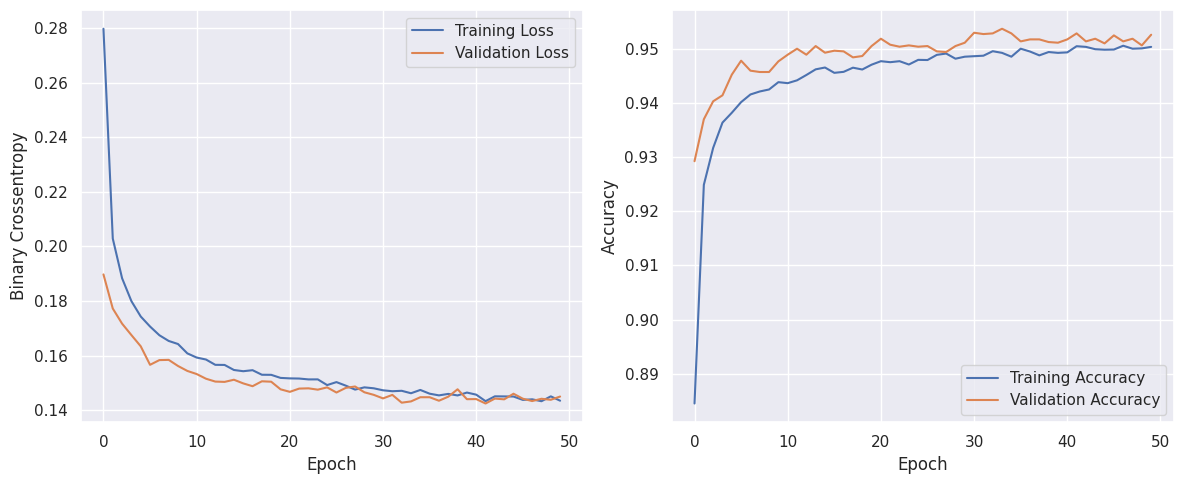

In [44]:
plot_learning_curve(history)

In [45]:
y_pred = final_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
y_pred

255/255 [==============================] - 0s 1ms/step


array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

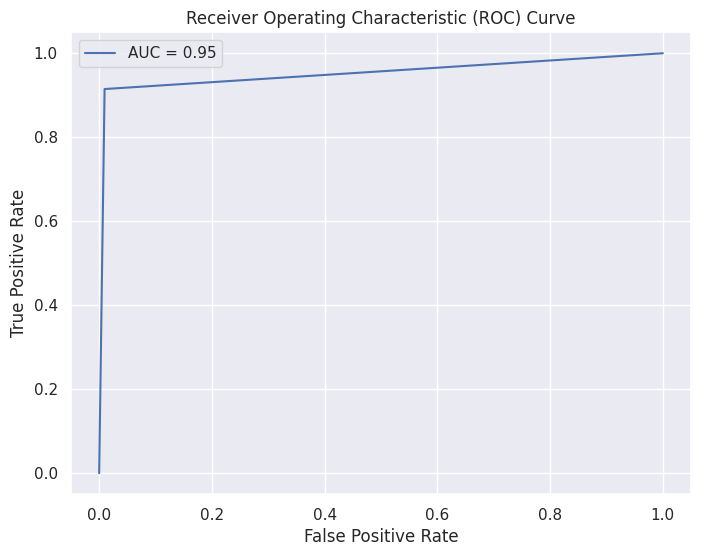

In [46]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Confusion Matrix')

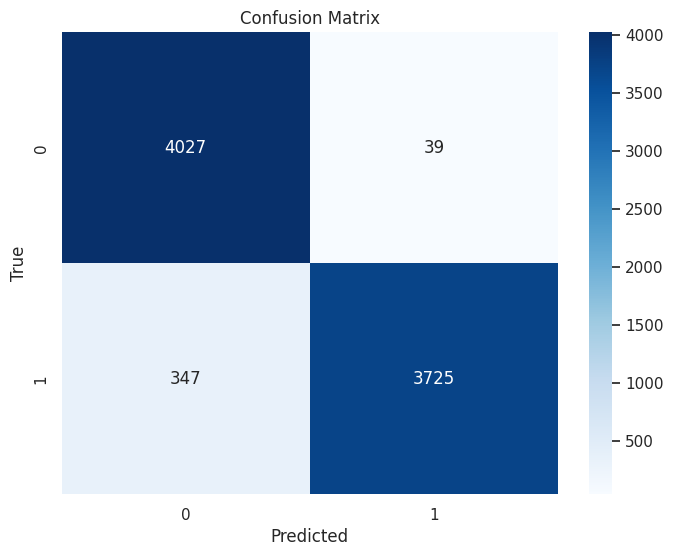

In [47]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix')

In [48]:
from sklearn.metrics import classification_report

print(f'classification report:')
print(classification_report(y_test, y_pred))

classification report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      4066
           1       0.99      0.91      0.95      4072

    accuracy                           0.95      8138
   macro avg       0.96      0.95      0.95      8138
weighted avg       0.96      0.95      0.95      8138

